<a href="https://colab.research.google.com/github/live2pro/Mastering-Exploratory-Analysis-with-pandas/blob/master/Copy_of_PANDAS_Command_by_Pryn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cum diff (เอาค่าของแถวบนมาใส่แถวถัดไป) previous value

In [ ]:
dx=df[['sale']].apply(lambda x: x.shift(1))

### Combine two index (list of columns name)

In [ ]:
full_col=col_net.join(col_sale,how="outer")   # Combine two indexs

### Filter column name contain string

In [ ]:
col_net = dxfull.columns[dxfull.columns.str.contains(pat = 'Net')]   # Filter columns contain "Net"

### Read file and determine index column

In [ ]:
df=pd.read_csv("file.csv",index_col=['customer_id'])

### Clean blank & Convert column to int

In [ ]:
df['Net Sales'] = df['Net Sales'].str.replace(' ', '0')
df['Net Sales']=df['Net Sales'].fillna(0)
df['Net Sales']=df['Net Sales'].astype('float').astype('int')

In [ ]:
def clean_Null_to_int(columnName):
    columnName = columnName.str.replace(' ', '0')
    columnName=columnName.fillna(0)
    columnName=columnName.astype('float').astype('int')
    return columnName

### Map Filter & Reduce & accumulate
map ใช้กับ listไม่ได้

In [ ]:
bot=[1,2,3]
eg=pd.Series(bot)
jim=eg.map(lambda x:x*10)   # return [10,20,30]

Reduce

In [ ]:
import functools
jum=functools.reduce(lambda x,y:x+y,eg)  # return (1+2+3)

accumulate()

### loc & iloc

In [ ]:
reviews.iloc[0]  #select row0 with all columns

In [ ]:
reviews.iloc[:, 0] # select all rows with first column

In [ ]:
reviews.iloc[:3, 0] # select row 0-2 with first column

In [ ]:
reviews.iloc[[0, 1, 2], 0]  # select row 0,1,2 with first column

In [ ]:
reviews.iloc[-5:] # last 5 rows (tail 5 rows)

In [ ]:
reviews.loc[0, 'country']

In [ ]:
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']] # select all rows with selected columns name

### Index Management

In [ ]:
reviews.set_index("title") # set index with selected column

### Conditional selection

In [ ]:
reviews.country == 'Italy' # retrun series

In [ ]:
reviews.loc[reviews.country == 'Italy']  # return dataframe

In [ ]:
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)] #condition "AND"

In [ ]:
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]  # condition "OR"

In [ ]:
reviews.loc[reviews.country.isin(['Italy', 'France'])]

In [ ]:
reviews.loc[reviews.price.notnull()]

### Auto generate variable name

In [ ]:
for i in list(["a","b"]):
  print(i)
  globals()[i]=i

print(a,b) # return a,b 

### Merge multiple dataframe

In [ ]:
from functools import reduce
#df1 ,df2, df3  มี foriegn key เดียวกัน ในที่นี้คือ name

data_frames = [df1, df2, df3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['name'],how='outer'), data_frames)

### Merge Multiple Keys

In [ ]:
new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

NameError: ignored

### Combine dataframe

In [ ]:
dfnew=pd.merge(left=df,right=dfname,how='left',left_on='NewThaiName',right_on='NewThaiName')

### Clean white space in column

In [ ]:
df['NewThaiName']=df['First Name_Check'].str.strip()+str(" ")+df['Last Name_Check'].str.strip()

### Cosine Similarity หาคำที่ใกล้เคียงกัน

In [ ]:
def word2vec(word):
    from collections import Counter
    from math import sqrt

    # count the characters in word
    cw = Counter(word)
    # precomputes a set of the different characters
    sw = set(cw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))

    # return a tuple
    return cw, sw, lw

def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]

list_A = [1,2,3,4 ]  หรือ series eg, dfxE[dfxE['NewThaiName'].isnull()]['eFullName'].unique()
list_B = [1,2,3,4 ]  หรือ series eg,  dfname['eFullName']

correctName=[]
badname = []
threshold = 0.92   # if needed
for key in list_A:
    for word in list_B:
        try:
            # print(key)
            # print(word)
            res = cosdis(word2vec(word), word2vec(key))
            if res*100 > 92 :
              correctName.append(word)
              badname.append(key)

            # print(res)
              print("The cosine similarity between : {} and : {} is: {}".format(word, key, res*100))
            # if res > threshold:
            #     print("Found a word with cosine distance > 80 : {} with original word: {}".format(word, key))
        except IndexError:
            pass

            

### Filter dataframe

In [ ]:
dfTh[dfTh['First Name']=="ชาติบัณฑิต"].head(2)

### value_counts()

In [ ]:
dfTh['First Name'].str.startswith('นางสาว').value_counts()

### Replace value in column

In [ ]:
dfTh['Last Name'] = dfTh['Last Name'].replace(['old value'],'new value')

### Check null value in columns show result in df

In [ ]:
# check error after combine data
dfxT[dfxT['NewThaiName'].isnull()]
missing_name=dfnew[dfnew['tFullName'].isnull()][['Full Name_Check','tFullName']] # show result in dataframe with 2 columns

### Select specific columns show in df form

In [ ]:
dfx[['col1','col2']]

### Export to CSV with utf-8 for excel

In [ ]:
dfx.to_csv("21.08.06.Full-clean-ExamResult.csv",encoding="utf-8-sig",,index=False)

### Sorting value in Df

In [ ]:
df1=df.sort_values(by="First Name", ascending=True).reset_index()

### แก้ปัญหา SettingWithCopy (error เวลา assign ค่าให้ df)

In [ ]:
df_project_1_clean=df_project_1_clean.copy()
df_project_1_clean['Project']=name_project1
df_project_1_clean['Leader']=leader_project1

### Silence install package in Colab

In [ ]:
! pip install -q google-api-python-client

In [ ]:
import pandas as pd
import numpy as np
import random

### How to use variable in a query in pandas

https://www.listendata.com/2020/12/how-to-use-variable-in-query-in-pandas.html

In [ ]:
df=pd.DataFrame({'boto':[1,2,3,4],
                 'jimbo':[3,4,5,6],
                 'type':['a','b','c','a']})

In [ ]:
# save to google drive folder Colab Notebook
df.to_csv("/content/drive/My Drive/Colab Notebooks/boto1.csv")

In [ ]:
df1=pd.read_csv("/content/drive/My Drive/Colab Notebooks/boto.csv")

In [ ]:
df1

,Unnamed: 0,boto,jimbo,type
0,0,1,3,a
1,1,2,4,b
2,2,3,5,c
3,3,4,6,a


### Googlesheet

### While

In [ ]:
che=[]
i=0
while i < len(clean_dfx):
  che.append(str(local_datetime))
  i+=1

https://colab.research.google.com/drive/1laBs99BWBBKRdt2loD-E7YAho6ySDTBD#scrollTo=2QJp4EqVzfbg

### Local Date time

In [ ]:
import time
from time import gmtime, strftime,localtime
local_datetime=strftime("%Y-%m-%d %H:%M:%S", localtime())

In [ ]:
local_datetime

'2021-01-04 13:55:56'

Change Date format

In [ ]:
All_df['Date']=[i.strftime("%d/%m/%y") for i in All_df['Date'] ]

### Convert to datetime

In [ ]:
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

Pivot table

In [ ]:
df.pivot_table(df,index=['type'],aggfunc='sum')

,boto,jimbo
type,,
a,5,9
b,2,4
c,3,5


### Create dataframe

In [ ]:
df=pd.DataFrame(boto,columns=["sex"])

In [ ]:
clean_dfx=clean_dfx[clean_dfx["Country/Territory/Area"].notnull()]

Rename column

In [ ]:
newdf.rename({'level_0': 'Category', 'level_1': 'sub_id'}, axis=1, inplace=True)

NameError: ignored

### Get column name 

In [ ]:
column_name=list(df.columns.values)    # get list of header in dataframe

### List null rows & Drop null

In [ ]:
region_nan=region[region["Unnamed: 2"].isnull()].index

In [ ]:
region_clean=region.drop(region_nan)

In [ ]:
filtered_df = region[region['Confirmed Cases'].isnull() & region['WHO Regional Office'].isnull()].index

### chcek version pandas

In [ ]:
print(pd.__version__)

1.0.5


In [ ]:
df.head(5)

,boto,jimbo,type
0,1,3,a
1,2,4,b
2,3,5,c
3,4,6,a


In [ ]:
male=['m','M','male','man']
female=['w','W','f','F','female']

In [ ]:
# ใช้ lambda และ list comprehension แปลงค่า sex ให้เป็น 0,1 
df['sex1']=df['sex'].apply(lambda x : 1 if x in ['m','M','male','man'] else 0)

In [ ]:
# def encodeSex(x):
x=df['sex']
for i,v in x.iteritems():
 print(i,v)

0 W
1 F
2 f
3 w
4 m
5 f
6 f
7 W
8 W
9 w
10 m
11 man
12 W
13 male
14 w


### Filter dataframe with values in columns

In [ ]:
df1=df[df.jimbo==6] & df[df.boto==4]
df1

,boto,jimbo
3,4,6


In [ ]:
filtered_df = region[region['Confirmed Cases'].isnull() & region['WHO Regional Office'].isnull()].index

In [ ]:
clean_dfx=clean_dfx[clean_dfx["Country/Territory/Area"]!="Total"]

In [ ]:
clean_dfx=clean_dfx[clean_dfx["Country/Territory/Area"].notnull()]

### Filter with boolean index





### for loop for Series => itteritems()
เก็บค่า (index,value) แบบ tuple  ใช้ => for i,v in df.itteritems() ได้

In [ ]:
for i,v in ex.iteritems():
  print(i,v)

W 4
f 3
w 3
m 2
male 1
man 1
F 1


In [ ]:
#outlier_rows = (df['Age'] > upper_limit) | (df['Age'] < lower_limit) 

In [ ]:
df.head(2)

,sex,sex1,gender
0,W,0,female
1,F,0,female


In [ ]:
df

,sex,sex1,gender
0,W,0,female
1,F,0,female
2,f,0,female
3,w,0,female
4,m,1,male
5,f,0,female
6,f,0,female
7,W,0,female
8,W,0,female
9,w,0,female


In [ ]:
# boolean mask กรองเอาแถวที่ sex1==0 เท่านั้น
mask=df['sex1']==0
df[mask] 


,sex,sex1,gender
0,W,0,female
1,F,0,female
2,f,0,female
3,w,0,female
5,f,0,female
6,f,0,female
7,W,0,female
8,W,0,female
9,w,0,female
12,W,0,female


Settype to Cagegory

In [ ]:
df["Status"] = df["Status"].astype("category")
df["Status"].cat.set_categories(["won","pending","presented","declined"],inplace=True)

### Groupby

In [ ]:
df.groupby('type').count()[['boto']]

,boto
type,
a,3
b,1


### labmda function with if-else

In [ ]:
# return ค่า index ของ tuple ตามค่า value ที่ป้อนเข้าไป (index,value) eg:(male,1)
def getValue(q):
  for i,v in ex.iteritems():
    if v==q:
      return i

In [ ]:
botx=lambda x,y: (x+y) if x<y else (x-y if x>y  else x*y)
botx(9,9)

81

In [ ]:
print(getValue(ex.max()),ex.max())

W 4


In [ ]:
ex1=pd.DataFrame(ex).reset_index()

In [ ]:
ex1

,index,sex
0,W,4
1,f,3
2,w,3
3,m,2
4,male,1
5,man,1
6,F,1


In [ ]:
ex1['sex'].max()

4

In [ ]:
ex1['index'].max()

'w'

In [ ]:
ex1['sex'].mode() # return มาเป็น series

0    1
dtype: int64

In [ ]:
ex1['sex'].mode()[0] # หาค่าที่พบบ่อยที่สุด

1

### List values of each category data by using => df['col1'].value_counts()

In [ ]:
ex=df['sex'].value_counts() # ตรวจสอบว่า column Embarked มีค่าใด อย่างละเท่าไหร่บ้าง
ex.index

Index(['W', 'f', 'w', 'm', 'male', 'man', 'F'], dtype='object')

### np.where 
กำหนดเงื่อนไขในการจัดการ series

In [ ]:
# if (sex1==0) "femail" else "male"
df['gender'] = np.where(df['sex1']==0, "female","male")

In [ ]:
# สามารถใช้ funcion ในคำสั่่งได้ เช่น count,sum,max 
# คำสั่งนี้ให้ผลแบบ aggregation จึงต้องใช้คำสั่งกลุ่ม agg  เช่น max,sum,min,avg เป็นต้น
ge=np.where(df.columns=='sex1', df.sex1.sum(),np.nan)

In [ ]:
df

,sex,sex1,gender
0,W,0,female
1,F,0,female
2,f,0,female
3,w,0,female
4,m,1,male
5,f,0,female
6,f,0,female
7,W,0,female
8,W,0,female
9,w,0,female


## Random

### **Random with bias/weight**

In [ ]:
#random
pdt=['Credit card','Mortgage','Student loan','Consumer Loan','Vehicle loan','Prepaid card','Other financial service']
probability = [0.4,0.2,0.1,0.15,0.05,0.09,0.01]
sum(probability)

1.0

In [ ]:
# Function create list with bias or weight
def biase(lst,probability):
    zipped = zip(lst,probability)
    lst = [[i[0]] * int(i[1]*100) for i in zipped]
    new = [b for i in lst for b in i]
    return new

In [ ]:
# Return list of product
list_pdt=[random.choice(biase(pdt,probability)) for i in  range(1296675)]



## Rename column

In [ ]:
df.rename(columns={"A": "a", "B": "c"})

### Select & Query

https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/

In [ ]:
df_new = df[(df.zscore>-3) & (df.zscore<3)]

In [ ]:
clus1=kmean_results.query('JobRole == "Sales Executive" & Cluster=="Cluster 1"')

In [ ]:
dfnew1=df.query('Company in ["BANK OF AMERICA, NATIONAL ASSOCIATION","WELLS FARGO & COMPANY"]')

### Sorting

In [ ]:
df.sort_values(by="boto",ascending=False)

,boto
3,4
2,3
1,2
0,1


### Sub-select columns to dataframe  => df[[ 'col1' , 'col2' ]]

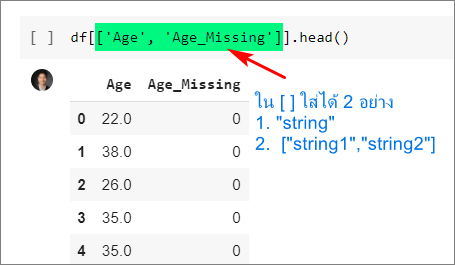

In [ ]:
aa=['sex','sex1']
gc=[i for i in aa]
ge=np.where(df.columns=='sex1', df.sex1.sum(),np.nan)
ge

array([nan,  4., nan])

In [ ]:
df[gc]

,sex,sex1
0,W,0
1,F,0
2,f,0
3,w,0
4,m,1
5,f,0
6,f,0
7,W,0
8,W,0
9,w,0


### zip() and list()

In [ ]:
sex =('m','M','male','man','w','W','f','F','female')

In [ ]:
number=[i for i in range(12)]

In [ ]:
boto=[random.choice(sex) for i in range(15) ]

In [ ]:
x=list(zip(number,boto))

### Combine Dataframe (CONCAT)

In [ ]:
newdf=pd.concat([DF1,DF2])